In [3]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import  plot_histogram
from qiskit.ignis.mitigation.measurement import  CompleteMeasFitter, complete_meas_cal

/var/folders/qd/80qccz1s1hjf4_mwyprp4_2w0000gn/T/ipykernel_2896/2999978159.py:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import  CompleteMeasFitter, complete_meas_cal


In [4]:
qc = QuantumCircuit(3,3)

In [5]:
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2], [0,1,2])

In [6]:
backend  = Aer.get_backend('qasm_simulator')

In [7]:
qc_transpiled = transpile(qc, backend)

In [8]:
qobj = assemble(qc_transpiled, shots=1000)
job = backend.run(qobj)
result  =job.result()
counts = result.get_counts()

/var/folders/qd/80qccz1s1hjf4_mwyprp4_2w0000gn/T/ipykernel_2896/2842813139.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)


In [9]:
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0,1,2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
means_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = means_fitter.filter.apply(counts)

/var/folders/qd/80qccz1s1hjf4_mwyprp4_2w0000gn/T/ipykernel_2896/729203106.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(assemble(cal_circuits, backend=backend))


In [10]:
# Print the original counts
print("Original counts:")
print(counts)

# Print the mitigated counts
print("Mitigated counts:")
print(mitigated_counts)

Original counts:
{'111': 476, '000': 524}
Mitigated counts:
{'000': 524.0000000204814, '001': 1.1191002853878848e-09, '010': 1.1301888809795921e-09, '011': 1.130079824916032e-09, '100': 1.1322039376669318e-09, '101': 1.1317665999950721e-09, '110': 1.1311395797257086e-09, '111': 475.9999999727441}


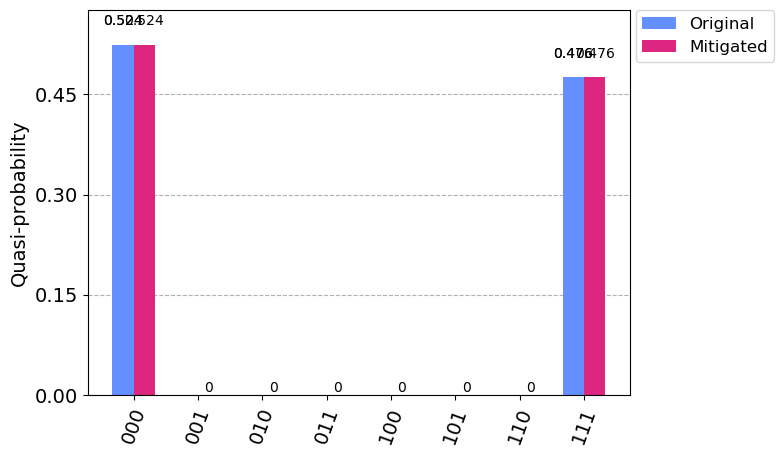

In [11]:
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])
